# Location Set Covering Problem (LSCP)

#### Import the required modules

In [1]:
import warnings
warnings.filterwarnings('ignore')
import geopandas
import matplotlib.pyplot as plt
import pulp
from allagash import Coverage, Problem
%matplotlib inline

#### Load the data

In [2]:
d = geopandas.read_file("sample_data/demand_point.shp")
s = geopandas.read_file("sample_data/facility_service_areas.shp")
s2 = geopandas.read_file("sample_data/facility2_service_areas.shp")

#### Plot the data

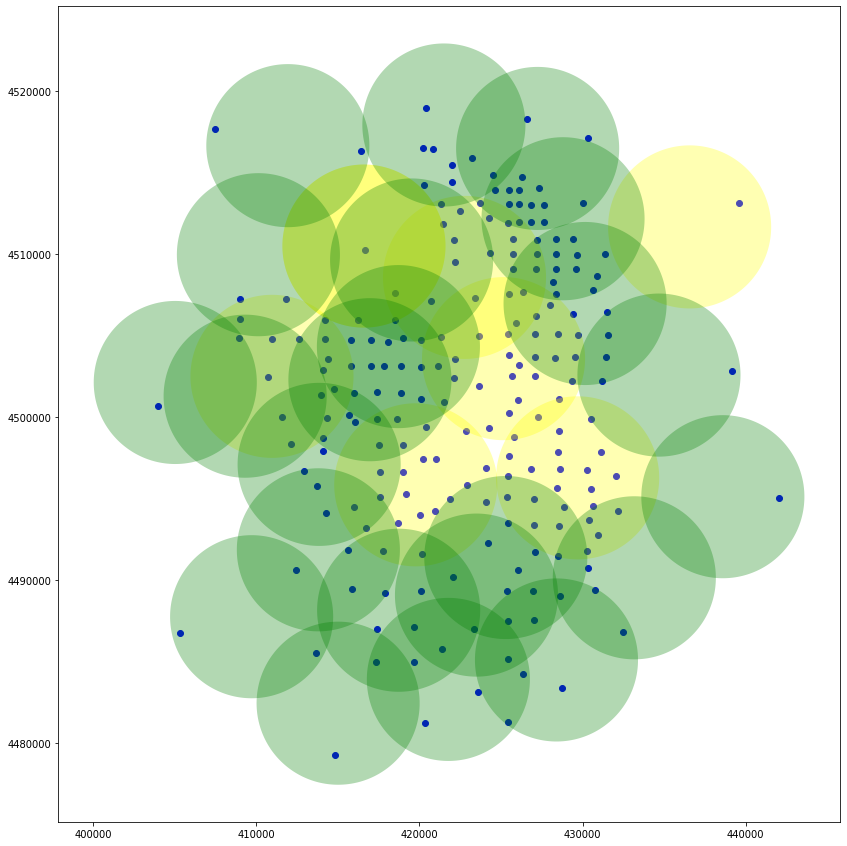

In [3]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect('equal')
d.plot(ax=ax, color='blue')
s.plot(ax=ax, color='yellow', alpha=0.3)
s2.plot(ax=ax, color='green', alpha=0.3);

#### Create the coverage

In [4]:
coverage1 = Coverage.from_geodataframes(d, s, "GEOID10", "ORIG_ID", demand_name="demand")
coverage2 = Coverage.from_geodataframes(d, s2, "GEOID10", "ORIG_ID", demand_name="demand")

#### Create the problem

In [5]:
problem = Problem.lscp([coverage1, coverage2])

#### Solve the problem

In [6]:
problem.solve(pulp.GLPK());

#### Plot the selected locations

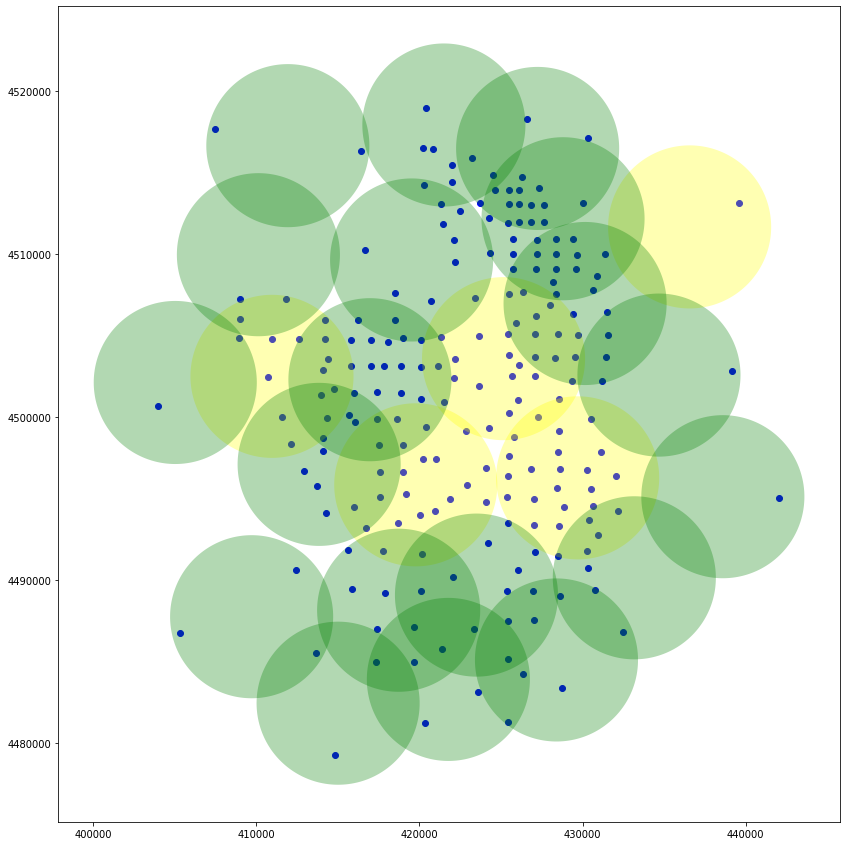

In [7]:
selected_locations = s.query(f"ORIG_ID in ({[f'{i}' for i in problem.selected_supply(coverage1)]})")
selected_locations2 = s2.query(f"ORIG_ID in ({[f'{i}' for i in problem.selected_supply(coverage2)]})")

fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect('equal')
d.plot(ax=ax, color='blue')
selected_locations.plot(ax=ax, color='yellow', alpha=0.3)
selected_locations2.plot(ax=ax, color='green', alpha=0.3);

#### Find the total demand that is covered

In [8]:
covered_demand = d.query(f"GEOID10 in ({[f'{i}' for i in problem.selected_demand(coverage1)]})")
print(f'{(covered_demand["Population"].sum() / d["Population"].sum()*100):0.2f}')

100.00
